In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/air-quality-index/train.csv
/kaggle/input/air-quality-index/test.csv


In [2]:
df_train = pd.read_csv('/kaggle/input/air-quality-index/train.csv')
df_test = pd.read_csv('/kaggle/input/air-quality-index/test.csv')


In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33750 entries, 0 to 33749
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date_time            33750 non-null  object 
 1   is_holiday           43 non-null     object 
 2   humidity             33750 non-null  int64  
 3   wind_speed           33750 non-null  int64  
 4   wind_direction       33750 non-null  int64  
 5   visibility_in_miles  33750 non-null  int64  
 6   dew_point            33750 non-null  int64  
 7   temperature          33750 non-null  float64
 8   rain_p_h             33750 non-null  float64
 9   snow_p_h             33750 non-null  float64
 10  clouds_all           33750 non-null  int64  
 11  weather_type         33750 non-null  object 
 12  air_pollution_index  33750 non-null  int64  
 13  traffic_volume       33750 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 3.6+ MB


In [4]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14454 entries, 0 to 14453
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date_time            14454 non-null  object 
 1   is_holiday           18 non-null     object 
 2   humidity             14454 non-null  int64  
 3   wind_speed           14454 non-null  int64  
 4   wind_direction       14454 non-null  int64  
 5   visibility_in_miles  14454 non-null  int64  
 6   dew_point            14454 non-null  int64  
 7   temperature          14454 non-null  float64
 8   rain_p_h             14454 non-null  float64
 9   snow_p_h             14454 non-null  int64  
 10  clouds_all           14454 non-null  int64  
 11  weather_type         14454 non-null  object 
 12  traffic_volume       14454 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.4+ MB


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OrdinalEncoder

%matplotlib inline

In [6]:
df_train.head(5)

,date_time,is_holiday,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,air_pollution_index,traffic_volume
0,2012-10-02 09:00:00,NaN,89,2,329,1,1,288.28,0.0,0.0,40,Clouds,121,5545
1,2012-10-02 10:00:00,NaN,67,3,330,1,1,289.36,0.0,0.0,75,Clouds,178,4516
2,2012-10-02 11:00:00,NaN,66,3,329,2,2,289.58,0.0,0.0,90,Clouds,113,4767
3,2012-10-02 12:00:00,NaN,66,3,329,5,5,290.13,0.0,0.0,90,Clouds,20,5026
4,2012-10-02 13:00:00,NaN,65,3,329,7,7,291.14,0.0,0.0,75,Clouds,281,4918


In [7]:

df_train.describe()





,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,air_pollution_index,traffic_volume
count,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000
mean,71.209007,3.378193,199.471852,4.989748,4.989748,280.069587,0.448739,0.000318,50.458785,154.841422,3240.118163
std,16.852248,2.055792,99.841088,2.570021,2.570021,13.415256,53.526500,0.009760,38.871734,83.735515,1991.487289
min,13.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000
25%,60.000000,2.000000,130.000000,3.000000,3.000000,271.720000,0.000000,0.000000,1.000000,83.000000,1165.250000
50%,72.000000,3.000000,200.000000,5.000000,5.000000,280.150000,0.000000,0.000000,64.000000,155.000000,3335.000000
75%,85.000000,5.000000,290.000000,7.000000,7.000000,290.620000,0.000000,0.000000,90.000000,228.000000,4926.000000
max,100.000000,16.000000,360.000000,9.000000,9.000000,308.240000,9831.300000,0.510000,100.000000,299.000000,7280.000000


In [8]:
df_train.isnull().sum()



date_time                  0
is_holiday             33707
humidity                   0
wind_speed                 0
wind_direction             0
visibility_in_miles        0
dew_point                  0
temperature                0
rain_p_h                   0
snow_p_h                   0
clouds_all                 0
weather_type               0
air_pollution_index        0
traffic_volume             0
dtype: int64

In [9]:
df_train.select_dtypes(include='object').nunique()

date_time       28589
is_holiday         11
weather_type       11
dtype: int64

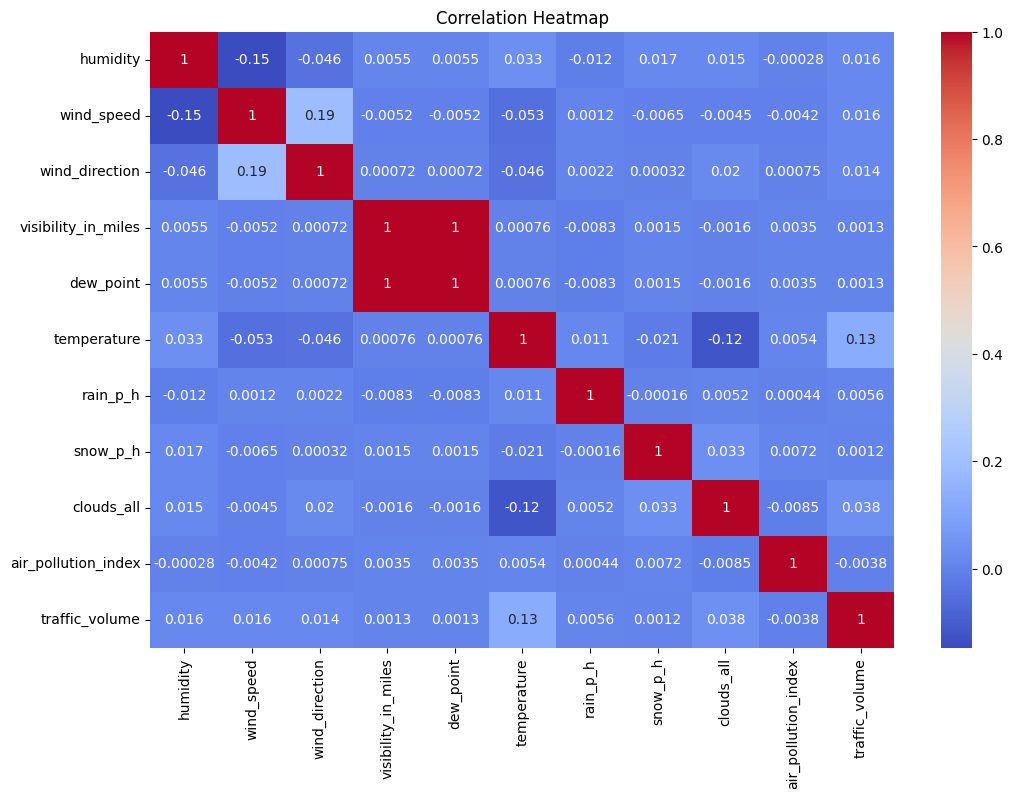

In [10]:
# Επιλογή μόνο αριθμητικών στηλών
numeric_df = df_train.select_dtypes(include=[np.number])

# Θερμότητα συσχετίσεων μόνο με αριθμητικά δεδομένα
plt.figure(figsize=(12,8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [11]:
# change date column from object to date-time format
df_train['date_time'] = pd.to_datetime(df_train['date_time'])

#drop holiday column because most of the value is none (normal day) therefore has no significant impact
df_train.drop('is_holiday', axis=1, inplace=True)

#change wather_type column to representative number using Ordinal encoder
encoder = OrdinalEncoder()
weather = df_train[['weather_type']]
weather_enc = encoder.fit_transform(weather)
df_train['weather_type'] = weather_enc
df_train.head(2)

,date_time,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,air_pollution_index,traffic_volume
0,2012-10-02 09:00:00,89,2,329,1,1,288.28,0.0,0.0,40,1.0,121,5545
1,2012-10-02 10:00:00,67,3,330,1,1,289.36,0.0,0.0,75,1.0,178,4516


In [12]:
encoder.categories_

[array(['Clear', 'Clouds', 'Drizzle', 'Fog', 'Haze', 'Mist', 'Rain',
        'Smoke', 'Snow', 'Squall', 'Thunderstorm'], dtype=object)]

In [13]:
df_train.describe()

,date_time,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,air_pollution_index,traffic_volume
count,33750,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000
mean,2015-02-17 16:33:28.106666752,71.209007,3.378193,199.471852,4.989748,4.989748,280.069587,0.448739,0.000318,50.458785,2.520000,154.841422,3240.118163
min,2012-10-02 09:00:00,13.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000
25%,2013-08-16 01:15:00,60.000000,2.000000,130.000000,3.000000,3.000000,271.720000,0.000000,0.000000,1.000000,0.000000,83.000000,1165.250000
50%,2015-07-26 07:30:00,72.000000,3.000000,200.000000,5.000000,5.000000,280.150000,0.000000,0.000000,64.000000,1.000000,155.000000,3335.000000
75%,2016-07-28 09:45:00,85.000000,5.000000,290.000000,7.000000,7.000000,290.620000,0.000000,0.000000,90.000000,5.000000,228.000000,4926.000000
max,2017-05-17 23:00:00,100.000000,16.000000,360.000000,9.000000,9.000000,308.240000,9831.300000,0.510000,100.000000,10.000000,299.000000,7280.000000
std,NaN,16.852248,2.055792,99.841088,2.570021,2.570021,13.415256,53.526500,0.009760,38.871734,2.739005,83.735515,1991.487289


In [14]:
df_train['hour'] = df_train['date_time'].dt.hour
df_train['day'] = df_train['date_time'].dt.day
df_train['month'] = df_train['date_time'].dt.month
df_train['weekday'] = df_train['date_time'].dt.weekday


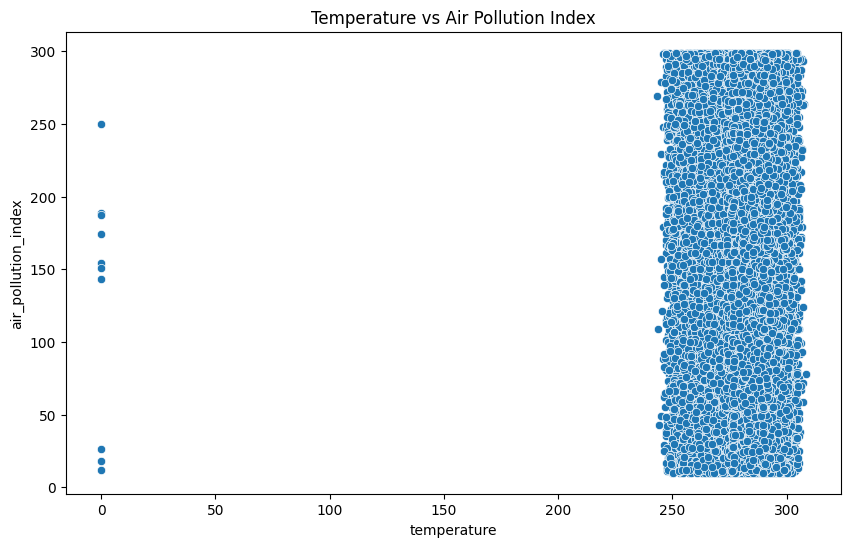

In [15]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='temperature', y='air_pollution_index', data=df_train)
plt.title('Temperature vs Air Pollution Index')
plt.show()


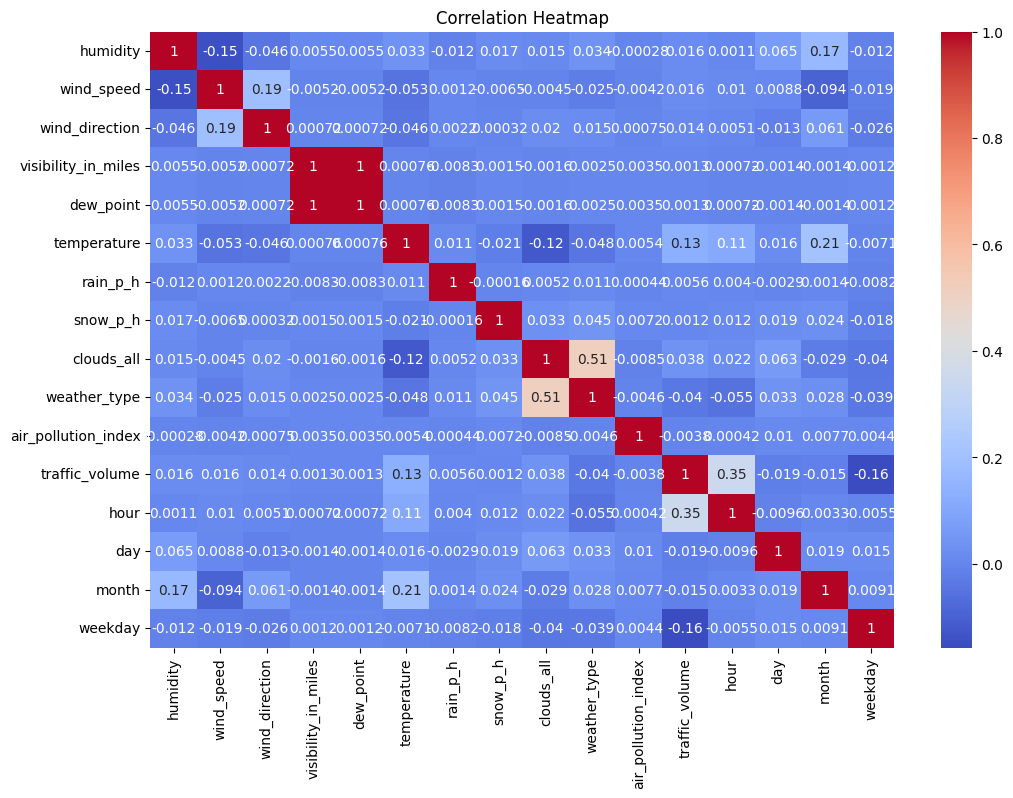

In [16]:
plt.figure(figsize=(12,8))
sns.heatmap(df_train.select_dtypes(include=[np.number]).corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [17]:
X = df_train.drop(['air_pollution_index', 'date_time'], axis=1)
y = df_train['air_pollution_index']


In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

model = RandomForestRegressor(n_estimators=100, random_state=42)
scores = cross_val_score(model, X, y, cv=5, scoring='neg_root_mean_squared_error')

print("Mean RMSE:", -scores.mean())


Mean RMSE: 84.75089282613558


In [19]:
df_test['date_time'] = pd.to_datetime(df_test['date_time'])
df_test.drop('is_holiday', axis=1, inplace=True)
df_test['weather_type'] = encoder.transform(df_test[['weather_type']])
df_test['hour'] = df_test['date_time'].dt.hour
df_test['day'] = df_test['date_time'].dt.day
df_test['month'] = df_test['date_time'].dt.month
df_test['weekday'] = df_test['date_time'].dt.weekday
X_test = df_test.drop(['date_time'], axis=1)


In [20]:
model.fit(X, y)
predictions = model.predict(X_test)


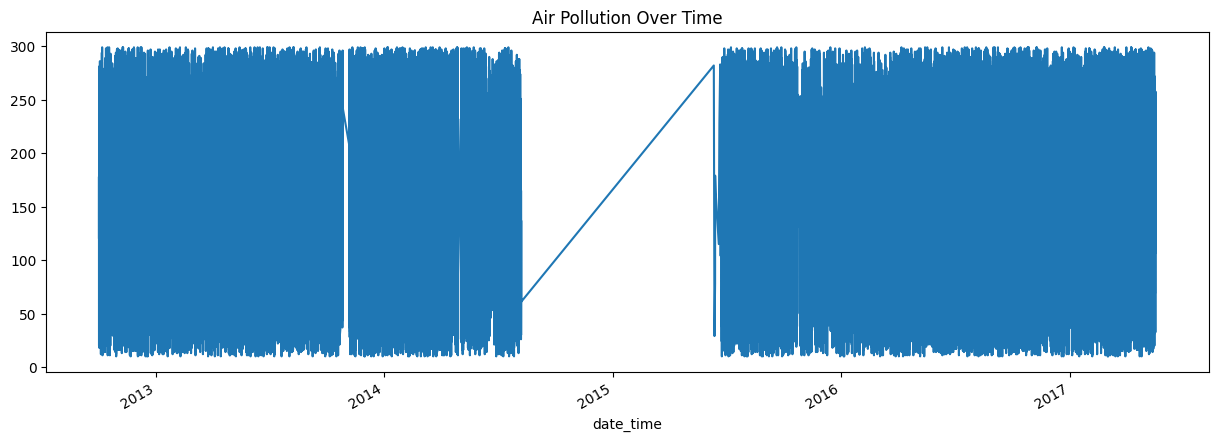

In [21]:
plt.figure(figsize=(15,5))
df_train.groupby('date_time')['air_pollution_index'].mean().plot()
plt.title("Air Pollution Over Time")
plt.show()


In [22]:
df_train['date_time'] = pd.to_datetime(df_train['date_time'])


In [23]:
df_train['is_weekend'] = df_train['date_time'].dt.weekday >= 5  # 5 = Saturday, 6 = Sunday
df_train['is_weekend'] = df_train['is_weekend'].astype(int)


In [24]:
df_train['hour'] = df_train['date_time'].dt.hour
df_train['rush_hour'] = df_train['hour'].apply(lambda x: 1 if (7 <= x <= 9) or (16 <= x <= 18) else 0)


In [25]:
def get_season(month):
    if month in [12, 1, 2]:
        return 0  # Winter
    elif month in [3, 4, 5]:
        return 1  # Spring
    elif month in [6, 7, 8]:
        return 2  # Summer
    else:
        return 3  # Autumn

df_train['season'] = df_train['date_time'].dt.month.apply(get_season)


In [26]:
df_train['temp_dew_diff'] = df_train['temperature'] - df_train['dew_point']


In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_train.drop(['date_time', 'air_pollution_index'], axis=1))
X_scaled = pd.DataFrame(scaled_features, columns=df_train.drop(['date_time', 'air_pollution_index'], axis=1).columns)
y = df_train['air_pollution_index']


In [28]:
X = df_train.drop(['date_time', 'air_pollution_index'], axis=1)
y = df_train['air_pollution_index']


In [29]:
from sklearn.model_selection import cross_val_score

models = {
    'LinearRegression': LinearRegression(),
    'DecisionTree': DecisionTreeRegressor(random_state=42),
    'RandomForest': RandomForestRegressor(random_state=42),
    'GradientBoosting': GradientBoostingRegressor(random_state=42),
    'KNN': KNeighborsRegressor(),
    'SVR': SVR()
}

for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring='r2')
    print(f"{name} Average R² Score: {scores.mean():.4f}")


LinearRegression Average R² Score: -0.0013
DecisionTree Average R² Score: -1.0724
RandomForest Average R² Score: -0.0273
GradientBoosting Average R² Score: -0.0067
KNN Average R² Score: -0.2033
SVR Average R² Score: -0.0003


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


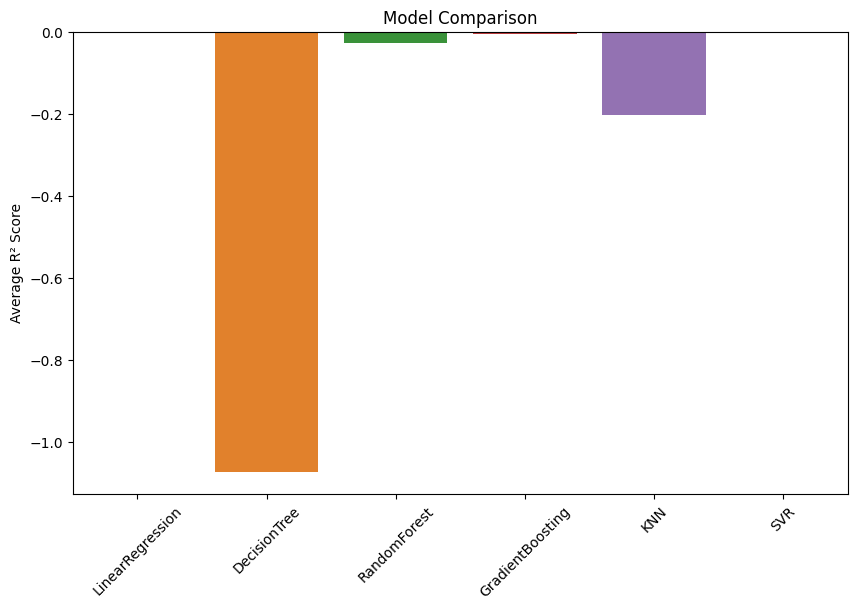

In [30]:
results = {}

for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring='r2')
    results[name] = scores.mean()

# Οπτικοποίηση
plt.figure(figsize=(10,6))
sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.ylabel("Average R² Score")
plt.title("Model Comparison")
plt.xticks(rotation=45)
plt.show()


In [31]:
best_model = RandomForestRegressor(random_state=42)
best_model.fit(X, y)


RandomForestRegressor(random_state=42)

In [32]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, scoring='r2', n_jobs=-1)
grid_search.fit(X, y)

print("Best parameters:", grid_search.best_params_)
print("Best R² score:", grid_search.best_score_)


Best parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}
Best R² score: -0.0033750661220202836


In [33]:
from sklearn.feature_selection import SelectKBest, f_regression

selector = SelectKBest(score_func=f_regression, k=8)  # κρατάμε τα 8 καλύτερα
X_selected = selector.fit_transform(X, y)


In [34]:
from sklearn.ensemble import VotingRegressor

ensemble_model = VotingRegressor([
    ('rf', RandomForestRegressor(random_state=42)),
    ('gbr', GradientBoostingRegressor(random_state=42)),
    ('lr', LinearRegression())
])

ensemble_model.fit(X, y)


VotingRegressor(estimators=[('rf', RandomForestRegressor(random_state=42)),
                            ('gbr', GradientBoostingRegressor(random_state=42)),
                            ('lr', LinearRegression())])

In [39]:
print(df_test['weather_type'].unique())
print(df_test['weather_type'].dtype)


[ 6.  5.  2.  1.  0.  4.  3. 10.  7.  8.]
float64
